In [179]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [16]:
# soup

'https://www.nba.com/stats/leaders/?Season=1996-97&SeasonType=Regular%20Season'

[<nba-stat-table filters="filters" ng-if="!isLoading &amp;&amp; !noData" params="params" rows="playerStats" template="players/players-leaders"></nba-stat-table>]

# Cleaning Advanced Data

In [71]:
df_advanced = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_advanced.html', match='Advanced')

In [72]:
df_per = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_per_game.html', match='Player Per Game')

In [73]:
df_advanced = df_advanced[0]

In [74]:
df_advanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           731 non-null    object 
 1   Player       731 non-null    object 
 2   Pos          731 non-null    object 
 3   Age          731 non-null    object 
 4   Tm           731 non-null    object 
 5   G            731 non-null    object 
 6   MP           731 non-null    object 
 7   PER          731 non-null    object 
 8   TS%          729 non-null    object 
 9   3PAr         729 non-null    object 
 10  FTr          729 non-null    object 
 11  ORB%         731 non-null    object 
 12  DRB%         731 non-null    object 
 13  TRB%         731 non-null    object 
 14  AST%         731 non-null    object 
 15  STL%         731 non-null    object 
 16  BLK%         731 non-null    object 
 17  TOV%         730 non-null    object 
 18  USG%         731 non-null    object 
 19  Unnamed:

In [75]:
drop_RK = df_advanced[df_advanced['Rk'] == 'Rk']

In [76]:
df_advanced = df_advanced.drop(drop_RK.index)

In [77]:
df_advanced = df_advanced.drop(['Unnamed: 19', 'Unnamed: 24'], axis=1)

In [78]:
df_advanced[df_advanced['Rk'] == 'Rk']

Empty DataFrame
Columns: [Rk, Player, Pos, Age, Tm, G, MP, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, OWS, DWS, WS, WS/48, OBPM, DBPM, BPM, VORP]
Index: []

[0 rows x 27 columns]

In [79]:
df_advanced.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [119]:
df_advanced[['Age', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']].astype(float)

Age     G      MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  ...  \
Rk                                                                    ...   
1    21.0  61.0   737.0  14.2  0.550  0.004  0.482  11.5  20.6  16.1  ...   
2    24.0   7.0    18.0  -6.5  0.125  0.250  0.000   0.0  16.9   8.8  ...   
3    27.0  58.0  1605.0  15.1  0.596  0.010  0.438  14.4  20.4  17.4  ...   
4    23.0  64.0  2143.0  22.7  0.626  0.010  0.443   7.7  22.6  15.3  ...   
5    35.0  26.0   674.0  15.7  0.556  0.270  0.159   3.0  15.8   9.4  ...   
..    ...   ...     ...   ...    ...    ...    ...   ...   ...   ...  ...   
536  28.0  27.0   696.0  15.9  0.563  0.369  0.160   4.4  12.5   8.4  ...   
537  32.0  68.0  1652.0  20.3  0.578  0.068  0.171  11.4  16.9  14.2  ...   
538  22.0  63.0  2125.0  23.0  0.589  0.357  0.491   2.0  10.5   6.3  ...   
539  28.0  48.0  1005.0  18.2  0.599  0.086  0.367  12.6  22.9  17.7  ...   
540  23.0  72.0  1609.0  19.1  0.693  0.010  0.434  13.6  22.4  18.1  ...   

     TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  
Rk                                                             
1    13.5  19.5  0.3  1.0  1.3  0.085  -3.5  -0.9  -4.5  -0.5  
2     0.0  18.6 -0.1  0.0 -0.1 -0.252 -14.9  -5.0 -19.8  -0.1  
3    17.5  11.7  2.3  1.7  4.0  0.119  -0.3  -0.5  -0.8   0.5  
4    15.0  23.7  5.6  3.2  8.8  0.197   2.9   1.9   4.7   3.6  
5     7.9  22.2  0.5  0.6  1.1  0.080  -0.2  -0.4  -0.6   0.2  
..    ...   ...  ...  ...  ...    ...   ...   ...   ...   ...  
536  12.7  17.1  0.8  0.5  1.3  0.092   0.2   0.6   0.8   0.5  
537  16.1  22.3  2.8  2.2  5.1  0.147   2.0   1.2   3.2   2.2  
538  16.2  33.0  5.9  1.3  7.2  0.163   5.4  -1.7   3.6   3.0  
539  11.9  18.3  2.1  1.1  3.3  0.156  -0.2  -0.1  -0.3   0.4  
540  14.7  15.1  4.8  2.1  6.9  0.206   0.7   0.0   0.7   1.1  

[705 rows x 23 columns]

In [121]:
df_advanced[advanced_list] = df_advanced[advanced_list].astype('float64')

In [122]:
df_advanced = df_advanced.set_index('Rk')

KeyError: "None of ['Rk'] are in the columns"

In [124]:
df_advanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 1 to 540
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  705 non-null    object 
 1   Pos     705 non-null    object 
 2   Age     705 non-null    float64
 3   Tm      705 non-null    object 
 4   G       705 non-null    float64
 5   MP      705 non-null    float64
 6   PER     705 non-null    float64
 7   TS%     703 non-null    float64
 8   3PAr    703 non-null    float64
 9   FTr     703 non-null    float64
 10  ORB%    705 non-null    float64
 11  DRB%    705 non-null    float64
 12  TRB%    705 non-null    float64
 13  AST%    705 non-null    float64
 14  STL%    705 non-null    float64
 15  BLK%    705 non-null    float64
 16  TOV%    704 non-null    float64
 17  USG%    705 non-null    float64
 18  OWS     705 non-null    float64
 19  DWS     705 non-null    float64
 20  WS      705 non-null    float64
 21  WS/48   705 non-null    float64
 22  OBPM   

In [125]:
df_advanced.describe()

Age           G           MP         PER         TS%  \
count  705.000000  705.000000   705.000000  705.000000  703.000000   
mean    25.870922   37.368794   833.740426   12.637872    0.541580   
std      4.094976   21.269180   673.778338    6.714505    0.105769   
min     19.000000    1.000000     3.000000  -40.600000    0.000000   
25%     23.000000   19.000000   237.000000    9.500000    0.507500   
50%     25.000000   37.000000   683.000000   12.500000    0.551000   
75%     28.000000   57.000000  1333.000000   16.300000    0.597000   
max     40.000000   72.000000  2667.000000   54.600000    1.078000   

             3PAr         FTr        ORB%        DRB%        TRB%  ...  \
count  703.000000  703.000000  705.000000  705.000000  705.000000  ...   
mean     0.392186    0.266209    4.785674   15.524397   10.149362  ...   
std      0.222460    0.269569    4.077562    6.654350    4.752754  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.245500    0.144500    1.900000   10.800000    6.600000  ...   
50%      0.410000    0.229000    3.400000   14.500000    9.100000  ...   
75%      0.543000    0.314500    6.500000   18.900000   12.600000  ...   
max      1.000000    4.000000   27.400000   41.400000   31.100000  ...   

             TOV%        USG%         OWS         DWS          WS       WS/48  \
count  704.000000  705.000000  705.000000  705.000000  705.000000  705.000000   
mean    12.798864   18.447660    0.875603    0.841560    1.719716    0.070196   
std      7.227610    5.521518    1.523863    0.808805    2.140437    0.103818   
min      0.000000    0.000000   -2.900000    0.000000   -1.900000   -1.113000   
25%      9.500000   14.700000    0.000000    0.200000    0.200000    0.033000   
50%     11.800000   17.900000    0.300000    0.600000    0.900000    0.078000   
75%     14.800000   21.600000    1.400000    1.300000    2.800000    0.121000   
max    100.000000   41.400000   12.200000    5.200000   15.600000    0.475000   

             OBPM        DBPM         BPM        VORP  
count  705.000000  705.000000  705.000000  705.000000  
mean    -1.791206   -0.351348   -2.142270    0.349078  
std      4.059635    1.595431    4.925467    0.974273  
min    -40.100000   -8.900000  -47.100000   -1.600000  
25%     -3.400000   -1.200000   -4.000000   -0.100000  
50%     -1.500000   -0.400000   -1.700000    0.000000  
75%      0.200000    0.600000    0.400000    0.500000  
max     24.100000    9.000000   31.100000    8.600000  

[8 rows x 23 columns]

# Cleaning Per Game Data

In [89]:
df_per = df_per[0]

KeyError: 0

In [136]:
df_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      731 non-null    object
 1   Player  731 non-null    object
 2   Pos     731 non-null    object
 3   Age     731 non-null    object
 4   Tm      731 non-null    object
 5   G       731 non-null    object
 6   GS      731 non-null    object
 7   MP      731 non-null    object
 8   FG      731 non-null    object
 9   FGA     731 non-null    object
 10  FG%     729 non-null    object
 11  3P      731 non-null    object
 12  3PA     731 non-null    object
 13  3P%     696 non-null    object
 14  2P      731 non-null    object
 15  2PA     731 non-null    object
 16  2P%     725 non-null    object
 17  eFG%    729 non-null    object
 18  FT      731 non-null    object
 19  FTA     731 non-null    object
 20  FT%     702 non-null    object
 21  ORB     731 non-null    object
 22  DRB     731 non-null    ob

In [163]:
drop_RK2 = df_per[df_per['Rk'] == 'Rk']

In [165]:
df_per = df_per.drop(drop_RK.index)

In [141]:
df_per = df_per.fillna(0)

In [167]:
df_per

Rk             Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  \
0      1   Precious Achiuwa  PF  21  MIA  61   4  12.1  2.0   3.7  ...  .509   
1      2       Jaylen Adams  PG  24  MIL   7   0   2.6  0.1   1.1  ...     0   
2      3       Steven Adams   C  27  NOP  58  58  27.7  3.3   5.3  ...  .444   
3      4        Bam Adebayo   C  23  MIA  64  64  33.5  7.1  12.5  ...  .799   
4      5  LaMarcus Aldridge   C  35  TOT  26  23  25.9  5.4  11.4  ...  .872   
..   ...                ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   ...   
726  536       Delon Wright  PG  28  SAC  27   8  25.8  3.9   8.3  ...  .833   
727  537     Thaddeus Young  PF  32  CHI  68  23  24.3  5.4   9.7  ...  .628   
728  538         Trae Young  PG  22  ATL  63  63  33.7  7.7  17.7  ...  .886   
729  539        Cody Zeller   C  28  CHO  48  21  20.9  3.8   6.8  ...  .714   
730  540        Ivica Zubac   C  23  LAC  72  33  22.3  3.6   5.5  ...  .789   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0    1.2  2.2  3.4  0.5  0.3  0.5  0.7  1.5   5.0  
1    0.0  0.4  0.4  0.3  0.0  0.0  0.0  0.1   0.3  
2    3.7  5.2  8.9  1.9  0.9  0.7  1.3  1.9   7.6  
3    2.2  6.7  9.0  5.4  1.2  1.0  2.6  2.3  18.7  
4    0.7  3.8  4.5  1.9  0.4  1.1  1.0  1.8  13.5  
..   ...  ...  ...  ...  ...  ...  ...  ...   ...  
726  1.0  2.9  3.9  3.6  1.6  0.4  1.3  1.1  10.0  
727  2.5  3.8  6.2  4.3  1.1  0.6  2.0  2.2  12.1  
728  0.6  3.3  3.9  9.4  0.8  0.2  4.1  1.8  25.3  
729  2.5  4.4  6.8  1.8  0.6  0.4  1.1  2.5   9.4  
730  2.6  4.6  7.2  1.3  0.3  0.9  1.1  2.6   9.0  

[705 rows x 30 columns]

In [96]:
df_per.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [168]:
per_cols = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

df_per[per_cols] = df_per[per_cols].astype('float64')

In [169]:
df_per

Rk             Player Pos   Age   Tm     G    GS    MP   FG   FGA  ...  \
0      1   Precious Achiuwa  PF  21.0  MIA  61.0   4.0  12.1  2.0   3.7  ...   
1      2       Jaylen Adams  PG  24.0  MIL   7.0   0.0   2.6  0.1   1.1  ...   
2      3       Steven Adams   C  27.0  NOP  58.0  58.0  27.7  3.3   5.3  ...   
3      4        Bam Adebayo   C  23.0  MIA  64.0  64.0  33.5  7.1  12.5  ...   
4      5  LaMarcus Aldridge   C  35.0  TOT  26.0  23.0  25.9  5.4  11.4  ...   
..   ...                ...  ..   ...  ...   ...   ...   ...  ...   ...  ...   
726  536       Delon Wright  PG  28.0  SAC  27.0   8.0  25.8  3.9   8.3  ...   
727  537     Thaddeus Young  PF  32.0  CHI  68.0  23.0  24.3  5.4   9.7  ...   
728  538         Trae Young  PG  22.0  ATL  63.0  63.0  33.7  7.7  17.7  ...   
729  539        Cody Zeller   C  28.0  CHO  48.0  21.0  20.9  3.8   6.8  ...   
730  540        Ivica Zubac   C  23.0  LAC  72.0  33.0  22.3  3.6   5.5  ...   

       FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0    0.509  1.2  2.2  3.4  0.5  0.3  0.5  0.7  1.5   5.0  
1    0.000  0.0  0.4  0.4  0.3  0.0  0.0  0.0  0.1   0.3  
2    0.444  3.7  5.2  8.9  1.9  0.9  0.7  1.3  1.9   7.6  
3    0.799  2.2  6.7  9.0  5.4  1.2  1.0  2.6  2.3  18.7  
4    0.872  0.7  3.8  4.5  1.9  0.4  1.1  1.0  1.8  13.5  
..     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
726  0.833  1.0  2.9  3.9  3.6  1.6  0.4  1.3  1.1  10.0  
727  0.628  2.5  3.8  6.2  4.3  1.1  0.6  2.0  2.2  12.1  
728  0.886  0.6  3.3  3.9  9.4  0.8  0.2  4.1  1.8  25.3  
729  0.714  2.5  4.4  6.8  1.8  0.6  0.4  1.1  2.5   9.4  
730  0.789  2.6  4.6  7.2  1.3  0.3  0.9  1.1  2.6   9.0  

[705 rows x 30 columns]

In [171]:
df_per = df_per.set_index('Rk')

KeyError: "None of ['Rk'] are in the columns"

In [172]:
df_per

Player Pos   Age   Tm     G    GS    MP   FG   FGA    FG%  \
Rk                                                                          
1     Precious Achiuwa  PF  21.0  MIA  61.0   4.0  12.1  2.0   3.7  0.544   
2         Jaylen Adams  PG  24.0  MIL   7.0   0.0   2.6  0.1   1.1  0.125   
3         Steven Adams   C  27.0  NOP  58.0  58.0  27.7  3.3   5.3  0.614   
4          Bam Adebayo   C  23.0  MIA  64.0  64.0  33.5  7.1  12.5  0.570   
5    LaMarcus Aldridge   C  35.0  TOT  26.0  23.0  25.9  5.4  11.4  0.473   
..                 ...  ..   ...  ...   ...   ...   ...  ...   ...    ...   
536       Delon Wright  PG  28.0  SAC  27.0   8.0  25.8  3.9   8.3  0.462   
537     Thaddeus Young  PF  32.0  CHI  68.0  23.0  24.3  5.4   9.7  0.559   
538         Trae Young  PG  22.0  ATL  63.0  63.0  33.7  7.7  17.7  0.438   
539        Cody Zeller   C  28.0  CHO  48.0  21.0  20.9  3.8   6.8  0.559   
540        Ivica Zubac   C  23.0  LAC  72.0  33.0  22.3  3.6   5.5  0.652   

     ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
Rk   ...                                                       
1    ...  0.509  1.2  2.2  3.4  0.5  0.3  0.5  0.7  1.5   5.0  
2    ...  0.000  0.0  0.4  0.4  0.3  0.0  0.0  0.0  0.1   0.3  
3    ...  0.444  3.7  5.2  8.9  1.9  0.9  0.7  1.3  1.9   7.6  
4    ...  0.799  2.2  6.7  9.0  5.4  1.2  1.0  2.6  2.3  18.7  
5    ...  0.872  0.7  3.8  4.5  1.9  0.4  1.1  1.0  1.8  13.5  
..   ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
536  ...  0.833  1.0  2.9  3.9  3.6  1.6  0.4  1.3  1.1  10.0  
537  ...  0.628  2.5  3.8  6.2  4.3  1.1  0.6  2.0  2.2  12.1  
538  ...  0.886  0.6  3.3  3.9  9.4  0.8  0.2  4.1  1.8  25.3  
539  ...  0.714  2.5  4.4  6.8  1.8  0.6  0.4  1.1  2.5   9.4  
540  ...  0.789  2.6  4.6  7.2  1.3  0.3  0.9  1.1  2.6   9.0  

[705 rows x 29 columns]

In [176]:
df_per.describe()

Age           G          GS          MP          FG         FGA  \
count  705.000000  705.000000  705.000000  705.000000  705.000000  705.000000   
mean    25.870922   37.368794   16.941844   19.435887    3.166099    6.944681   
std      4.094976   21.269180   21.603760    9.155005    2.278288    4.718210   
min     19.000000    1.000000    0.000000    1.800000    0.000000    0.000000   
25%     23.000000   19.000000    0.000000   12.500000    1.400000    3.500000   
50%     25.000000   37.000000    5.000000   19.300000    2.600000    5.900000   
75%     28.000000   57.000000   29.000000   26.900000    4.300000    9.300000   
max     40.000000   72.000000   72.000000   37.600000   11.200000   23.000000   

              FG%          3P         3PA         3P%  ...         FT%  \
count  705.000000  705.000000  705.000000  705.000000  ...  705.000000   
mean     0.442228    0.959858    2.714043    0.298926  ...    0.720965   
std      0.114836    0.877718    2.227645    0.142743  ...    0.207209   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.396000    0.200000    0.900000    0.250000  ...    0.667000   
50%      0.439000    0.700000    2.200000    0.333000  ...    0.769000   
75%      0.495000    1.500000    4.100000    0.386000  ...    0.842000   
max      1.000000    5.300000   12.700000    1.000000  ...    1.000000   

              ORB         DRB         TRB         AST         STL         BLK  \
count  705.000000  705.000000  705.000000  705.000000  705.000000  705.000000   
mean     0.805816    2.774043    3.579291    1.933617    0.612199    0.416170   
std      0.729362    1.818019    2.384859    1.813998    0.393439    0.408948   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.300000    1.500000    1.900000    0.700000    0.300000    0.100000   
50%      0.600000    2.500000    3.100000    1.400000    0.600000    0.300000   
75%      1.000000    3.700000    4.800000    2.500000    0.900000    0.600000   
max      4.700000   10.100000   14.300000   11.700000    2.100000    3.400000   

              TOV          PF         PTS  
count  705.000000  705.000000  705.000000  
mean     1.073759    1.622979    8.616596  
std      0.812583    0.761734    6.272808  
min      0.000000    0.000000    0.000000  
25%      0.500000    1.100000    4.000000  
50%      0.900000    1.600000    7.200000  
75%      1.400000    2.100000   11.700000  
max      5.000000    4.000000   32.000000  

[8 rows x 26 columns]

# Exploring NBA Per Game Data 

In [178]:
#Best 3 Point Shooters by Volume
df_per.sort_values(by=['3P'], inplace=False, ascending=False)

Player Pos   Age   Tm     G    GS    MP    FG   FGA    FG%  ...  \
Rk                                                                        ...   
116    Stephen Curry  PG  32.0  GSW  63.0  63.0  34.2  10.4  21.7  0.482  ...   
297   Damian Lillard  PG  30.0  POR  67.0  67.0  35.8   9.0  19.9  0.451  ...   
218      Buddy Hield  SG  28.0  SAC  71.0  71.0  34.3   5.7  14.0  0.406  ...   
328      CJ McCollum  SG  29.0  POR  47.0  47.0  34.0   8.6  18.8  0.458  ...   
432  Duncan Robinson  SF  26.0  MIA  72.0  72.0  31.4   4.4  10.0  0.439  ...   
..               ...  ..   ...  ...   ...   ...   ...   ...   ...    ...  ...   
272      Enes Kanter   C  28.0  POR  72.0  35.0  24.4   4.7   7.8  0.604  ...   
288        T.J. Leaf  PF  23.0  POR   7.0   0.0   5.0   0.7   1.4  0.500  ...   
289     Jalen Lecque  PG  20.0  IND   4.0   0.0   3.0   0.3   2.3  0.111  ...   
307      Will Magnay   C  22.0  NOP   1.0   0.0   3.0   0.0   1.0  0.000  ...   
540      Ivica Zubac   C  23.0  LAC  72.0  33.0  22.3   3.6   5.5  0.652  ...   

       FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
Rk                                                         
116  0.916  0.5  5.0   5.5  5.8  1.2  0.1  3.4  1.9  32.0  
297  0.928  0.5  3.7   4.2  7.5  0.9  0.3  3.0  1.5  28.8  
218  0.846  0.4  4.3   4.7  3.6  0.9  0.4  1.8  2.5  16.6  
328  0.812  0.6  3.3   3.9  4.7  0.9  0.4  1.4  1.9  23.1  
432  0.827  0.1  3.4   3.5  1.8  0.6  0.3  1.1  2.5  13.1  
..     ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  
272  0.774  3.9  7.1  11.0  1.2  0.5  0.7  1.1  2.3  11.2  
288  1.000  0.0  0.7   0.7  0.1  0.3  0.1  0.3  0.1   1.7  
289  1.000  0.5  0.8   1.3  0.5  0.0  0.0  0.0  0.0   1.3  
307  0.000  0.0  0.0   0.0  0.0  0.0  0.0  1.0  1.0   0.0  
540  0.789  2.6  4.6   7.2  1.3  0.3  0.9  1.1  2.6   9.0  

[705 rows x 29 columns]

In [181]:
sns.regplot(x="3P", y="3P%", data=df_per)


<AxesSubplot:xlabel='3P', ylabel='3P%'>

In [194]:


per_corr_matrix = df_per[['FTA', 'eFG%', '3P%', '3P', 'FGA','PTS']].corr()



sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Scoring efficency")

plt.show()

In [196]:
correlation_matrix = df_per.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Per Game Stats")

plt.xlabel("NBA Stats")

plt.ylabel("NBA Stats")

plt.show()

In [198]:
correlation_mat = df_per.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Player  Player    1.000000
        Pos      -0.048356
        Age       0.029435
        Tm        0.084082
        G         0.098772
                    ...   
PTS     STL       0.134457
        BLK      -0.034116
        TOV       0.135733
        PF        0.021265
        PTS       1.000000
Length: 841, dtype: float64


In [200]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Pos  Tm    -0.110973
Tm   Pos   -0.110973
BLK  PF    -0.078733
PF   BLK   -0.078733
     3P    -0.077798
              ...   
AST  AST    1.000000
STL  STL    1.000000
BLK  BLK    1.000000
2P   2P     1.000000
PTS  PTS    1.000000
Length: 841, dtype: float64


In [209]:
# High Correlation Pairs (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) < 1.0].sort_values(ascending=False)

print(strong_pairs.head(20))

FT      FTA       0.491815
FTA     FT        0.491815
3P      3PA       0.478173
3PA     3P        0.478173
Player  FG%       0.459345
FG%     Player    0.459345
Player  MP        0.427898
MP      Player    0.427898
Player  eFG%      0.402347
eFG%    Player    0.402347
2P%     Player    0.373213
Player  2P%       0.373213
FT%     Player    0.370216
Player  FT%       0.370216
        PTS       0.340832
PTS     Player    0.340832
FG%     2P%       0.336681
2P%     FG%       0.336681
eFG%    FG%       0.335389
FG%     eFG%      0.335389
dtype: float64


# Exploring NBA Advanced Data 

In [210]:
df_advanced.sort_values(by=['WS'], inplace=False, ascending=False)

Player Pos   Age   Tm     G      MP   PER    TS%   3PAr  \
Rk                                                                            
262           Nikola Jokić   C  25.0  DEN  72.0  2488.0  31.3  0.647  0.183   
179            Rudy Gobert   C  28.0  UTA  71.0  2187.0  23.5  0.683  0.007   
297         Damian Lillard  PG  30.0  POR  67.0  2398.0  25.6  0.623  0.528   
12   Giannis Antetokounmpo  PF  26.0  MIL  61.0  2013.0  29.2  0.633  0.201   
84            Jimmy Butler  SF  31.0  MIA  52.0  1745.0  26.5  0.607  0.139   
..                     ...  ..   ...  ...   ...     ...   ...    ...    ...   
309           Théo Maledon  PG  19.0  OKC  65.0  1778.0   8.2  0.489  0.510   
37           Darius Bazley  PF  20.0  OKC  55.0  1714.0   9.7  0.491  0.414   
197              Josh Hall  SF  20.0  OKC  21.0   336.0   1.0  0.363  0.374   
213          Killian Hayes  PG  19.0  DET  26.0   670.0   5.3  0.422  0.358   
406     Aleksej Pokusevski  PF  19.0  OKC  45.0  1090.0   6.1  0.430  0.507   

       FTr  ...  TOV%  USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  
Rk          ...                                                              
262  0.305  ...  13.1  29.6  12.2  3.4  15.6  0.301   9.2   2.5  11.7   8.6  
179  0.646  ...  13.7  17.0   6.1  5.2  11.3  0.248   2.0   2.5   4.5   3.6  
297  0.363  ...  11.6  31.4   9.6  0.8  10.4  0.209   7.4  -1.6   5.9   4.8  
12   0.528  ...  13.2  32.5   6.9  3.3  10.2  0.244   6.2   2.6   8.8   5.5  
84   0.565  ...  10.6  26.6   6.6  2.7   9.3  0.255   5.1   2.5   7.5   4.2  
..     ...  ...   ...   ...   ...  ...   ...    ...   ...   ...   ...   ...  
309  0.220  ...  17.3  19.4  -1.9  1.1  -0.8 -0.021  -4.1  -1.1  -5.2  -1.4  
37   0.258  ...  13.7  22.1  -2.3  1.4  -0.9 -0.026  -3.1  -1.4  -4.4  -1.0  
197  0.444  ...  17.4  18.1  -1.1  0.2  -0.9 -0.126  -9.7  -2.4 -12.1  -0.9  
213  0.085  ...  28.5  19.0  -1.8  0.6  -1.1 -0.081  -6.3  -1.0  -7.3  -0.9  
406  0.103  ...  18.8  20.5  -2.9  1.0  -1.9 -0.084  -5.2  -0.7  -5.9  -1.1  

[705 rows x 26 columns]

In [211]:
df_advanced.sort_values(by=['DWS'], inplace=False, ascending=False)

Player Pos   Age   Tm     G      MP   PER    TS%   3PAr    FTr  \
Rk                                                                              
179       Rudy Gobert   C  28.0  UTA  71.0  2187.0  23.5  0.683  0.007  0.646   
421     Julius Randle  PF  26.0  NYK  71.0  2667.0  19.7  0.567  0.294  0.325   
368      Nerlens Noel   C  26.0  NYK  64.0  1547.0  14.8  0.638  0.013  0.314   
186    Draymond Green  PF  30.0  GSW  63.0  1982.0  13.3  0.530  0.332  0.232   
262      Nikola Jokić   C  25.0  DEN  72.0  2488.0  31.3  0.647  0.183  0.305   
..                ...  ..   ...  ...   ...     ...   ...    ...    ...    ...   
100        Gary Clark  PF  26.0  PHI   2.0    13.0   3.8  0.000  0.000  0.000   
100        Gary Clark  SF  26.0  DEN   2.0     4.0   2.9    NaN    NaN    NaN   
391     Jabari Parker  PF  25.0  SAC   3.0    27.0   5.0  0.571  0.143  0.000   
393  Anžejs Pasečņiks   C  25.0  WAS   1.0     6.0 -40.6  0.000  1.000  0.000   
40        Jordan Bell   C  26.0  GSW   1.0    15.0   5.6  0.174  0.000  1.000   

     ...  TOV%  USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  
Rk   ...                                                              
179  ...  13.7  17.0   6.1  5.2  11.3  0.248   2.0   2.5   4.5   3.6  
421  ...  13.8  29.3   3.4  4.3   7.8  0.140   3.0   0.7   3.7   3.8  
368  ...  20.4   9.2   1.6  3.6   5.2  0.162  -2.5   3.5   1.0   1.2  
186  ...  31.0  13.1   1.2  3.4   4.6  0.112  -1.7   3.3   1.5   1.8  
262  ...  13.1  29.6  12.2  3.4  15.6  0.301   9.2   2.5  11.7   8.6  
..   ...   ...   ...   ...  ...   ...    ...   ...   ...   ...   ...  
100  ...   0.0   3.3   0.0  0.0   0.0  0.044 -10.5   2.6  -7.9   0.0  
100  ...   NaN   0.0   0.0  0.0   0.0  0.037  -8.5   0.3  -8.3   0.0  
391  ...  30.0  15.9  -0.1  0.0   0.0 -0.073  -7.5  -1.3  -8.8   0.0  
393  ...  83.3  41.4  -0.1  0.0  -0.1 -1.113 -40.1  -7.1 -47.1  -0.1  
40   ...  25.8  11.1   0.0  0.0   0.0 -0.026  -7.2   1.5  -5.7   0.0  

[705 rows x 26 columns]

In [213]:
sns.regplot(x="TS%", y="OWS", data=df_advanced)


<AxesSubplot:xlabel='TS%', ylabel='OWS'>

In [219]:
sns.swarmplot(x="Age", y="DWS", data=df_advanced)


C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.7% of the points 

<AxesSubplot:xlabel='Age', ylabel='DWS'>

C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.3% of the points

<AxesSubplot:xlabel='Age', ylabel='OWS'>

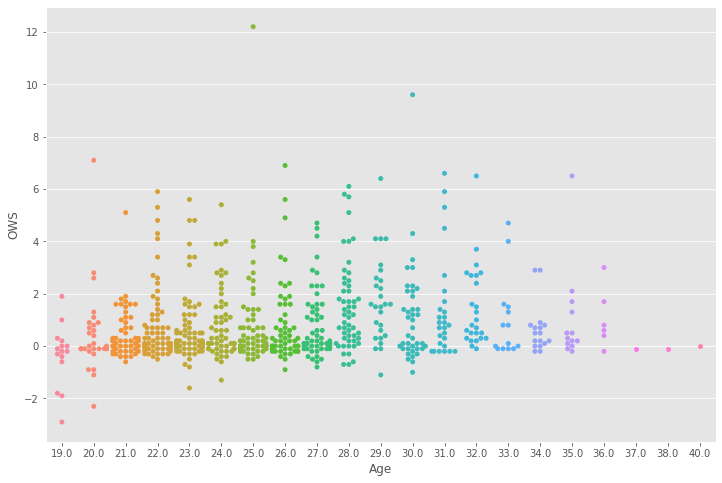

In [220]:
sns.swarmplot(x="Age", y="OWS", data=df_advanced)


C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.0% of the points

<AxesSubplot:xlabel='Age', ylabel='WS'>

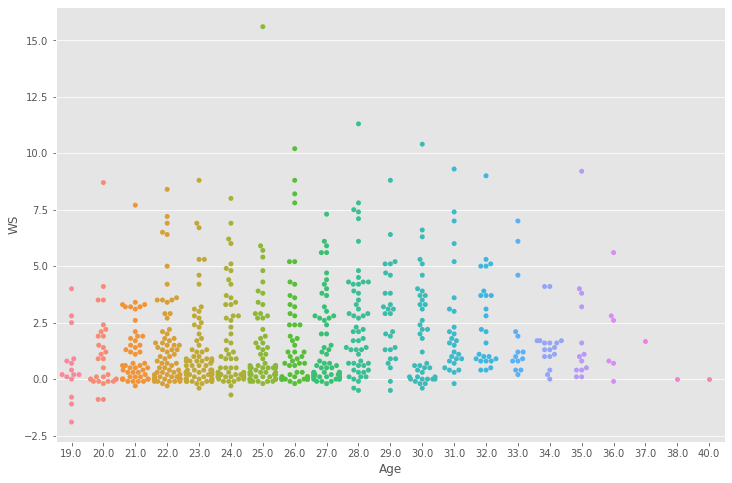

In [221]:
sns.swarmplot(x="Age", y="WS", data=df_advanced)


In [222]:
df_advanced.sort_values(by=['PER'], inplace=False, ascending=False)

Player Pos   Age   Tm     G      MP   PER    TS%   3PAr    FTr  \
Rk                                                                              
211     Udonis Haslem   C  40.0  MIA   1.0     3.0  54.6  1.000  0.000  0.000   
262      Nikola Jokić   C  25.0  DEN  72.0  2488.0  31.3  0.647  0.183  0.305   
146       Joel Embiid   C  26.0  PHI  51.0  1585.0  30.3  0.636  0.171  0.610   
400      Norvel Pelle   C  27.0  SAC   1.0     4.0  30.1  0.543  0.000  4.000   
399    Gary Payton II  PG  28.0  GSW  10.0    40.0  29.2  0.847  0.308  0.308   
..                ...  ..   ...  ...   ...     ...   ...    ...    ...    ...   
64   Ignas Brazdeikis  SF  22.0  PHI   1.0     8.0 -12.0  0.000  0.333  0.000   
194     Ashton Hagans  PG  21.0  MIN   2.0     4.0 -12.4    NaN    NaN    NaN   
503       Noah Vonleh  PF  25.0  BRK   4.0    11.0 -19.0  0.000  0.667  0.000   
307       Will Magnay   C  22.0  NOP   1.0     3.0 -35.1  0.000  1.000  0.000   
393  Anžejs Pasečņiks   C  25.0  WAS   1.0     6.0 -40.6  0.000  1.000  0.000   

     ...   TOV%  USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  
Rk   ...                                                               
211  ...    0.0  30.1   0.0  0.0   0.0  0.475  24.1   7.0  31.1   0.0  
262  ...   13.1  29.6  12.2  3.4  15.6  0.301   9.2   2.5  11.7   8.6  
146  ...   12.2  35.3   5.6  3.2   8.8  0.266   6.2   1.0   7.2   3.7  
400  ...    0.0  29.7   0.0  0.0   0.0  0.374   6.3  -4.9   1.4   0.0  
399  ...    6.3  16.8   0.2  0.1   0.3  0.331   0.5   9.0   9.5   0.1  
..   ...    ...   ...   ...  ...   ...    ...   ...   ...   ...   ...  
64   ...    0.0  16.1  -0.1  0.0  -0.1 -0.330 -18.9  -4.2 -23.2   0.0  
194  ...  100.0  10.5   0.0  0.0   0.0 -0.353 -13.8  -7.9 -21.7   0.0  
503  ...   40.0  19.8  -0.1  0.0  -0.1 -0.488 -20.9  -8.9 -29.9  -0.1  
307  ...   50.0  28.0   0.0  0.0   0.0 -0.787 -30.7  -8.9 -39.6   0.0  
393  ...   83.3  41.4  -0.1  0.0  -0.1 -1.113 -40.1  -7.1 -47.1  -0.1  

[705 rows x 26 columns]

In [227]:
adv_corr_matrix = df_advanced[['MP', 'PER','3PAr', 'FTr', 'USG%', 'WS', 'VORP', 'TOV%', 'TS%']].corr()

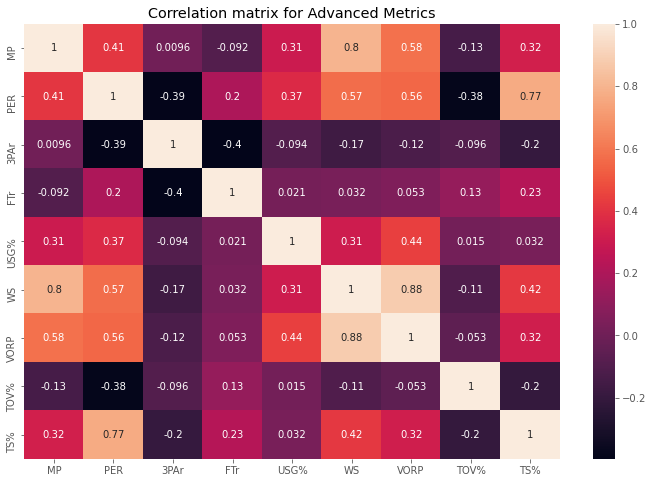

In [229]:

sns.heatmap(adv_corr_matrix, annot = True)

plt.title("Correlation matrix for Advanced Metrics")

plt.show()

# Joining the 2 DataFrames

In [233]:
df_combined = pd.merge(df_advanced,df_per,how='inner',on=['Player','Tm'])

In [244]:
df_combined

Player Pos_x  Age_x   Tm   G_x    MP_x   PER    TS%   3PAr  \
0     Precious Achiuwa    PF   21.0  MIA  61.0   737.0  14.2  0.550  0.004   
1         Jaylen Adams    PG   24.0  MIL   7.0    18.0  -6.5  0.125  0.250   
2         Steven Adams     C   27.0  NOP  58.0  1605.0  15.1  0.596  0.010   
3          Bam Adebayo     C   23.0  MIA  64.0  2143.0  22.7  0.626  0.010   
4    LaMarcus Aldridge     C   35.0  TOT  26.0   674.0  15.7  0.556  0.270   
..                 ...   ...    ...  ...   ...     ...   ...    ...    ...   
700       Delon Wright    PG   28.0  SAC  27.0   696.0  15.9  0.563  0.369   
701     Thaddeus Young    PF   32.0  CHI  68.0  1652.0  20.3  0.578  0.068   
702         Trae Young    PG   22.0  ATL  63.0  2125.0  23.0  0.589  0.357   
703        Cody Zeller     C   28.0  CHO  48.0  1005.0  18.2  0.599  0.086   
704        Ivica Zubac     C   23.0  LAC  72.0  1609.0  19.1  0.693  0.010   

       FTr  ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0    0.482  ...  0.509  1.2  2.2  3.4  0.5  0.3  0.5  0.7  1.5   5.0  
1    0.000  ...  0.000  0.0  0.4  0.4  0.3  0.0  0.0  0.0  0.1   0.3  
2    0.438  ...  0.444  3.7  5.2  8.9  1.9  0.9  0.7  1.3  1.9   7.6  
3    0.443  ...  0.799  2.2  6.7  9.0  5.4  1.2  1.0  2.6  2.3  18.7  
4    0.159  ...  0.872  0.7  3.8  4.5  1.9  0.4  1.1  1.0  1.8  13.5  
..     ...  ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
700  0.160  ...  0.833  1.0  2.9  3.9  3.6  1.6  0.4  1.3  1.1  10.0  
701  0.171  ...  0.628  2.5  3.8  6.2  4.3  1.1  0.6  2.0  2.2  12.1  
702  0.491  ...  0.886  0.6  3.3  3.9  9.4  0.8  0.2  4.1  1.8  25.3  
703  0.367  ...  0.714  2.5  4.4  6.8  1.8  0.6  0.4  1.1  2.5   9.4  
704  0.434  ...  0.789  2.6  4.6  7.2  1.3  0.3  0.9  1.1  2.6   9.0  

[705 rows x 53 columns]

In [245]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  705 non-null    object 
 1   Pos_x   705 non-null    object 
 2   Age_x   705 non-null    float64
 3   Tm      705 non-null    object 
 4   G_x     705 non-null    float64
 5   MP_x    705 non-null    float64
 6   PER     705 non-null    float64
 7   TS%     703 non-null    float64
 8   3PAr    703 non-null    float64
 9   FTr     703 non-null    float64
 10  ORB%    705 non-null    float64
 11  DRB%    705 non-null    float64
 12  TRB%    705 non-null    float64
 13  AST%    705 non-null    float64
 14  STL%    705 non-null    float64
 15  BLK%    705 non-null    float64
 16  TOV%    704 non-null    float64
 17  USG%    705 non-null    float64
 18  OWS     705 non-null    float64
 19  DWS     705 non-null    float64
 20  WS      705 non-null    float64
 21  WS/48   705 non-null    float64
 22  OB

In [260]:
df_combined.sort_values(by='PTS', inplace=False, ascending=False)

Player Pos_x  Age_x   Tm   G_x    MP_x   PER    TS%  \
151          Stephen Curry    PG   32.0  GSW  63.0  2152.0  26.3  0.655   
45            Bradley Beal    SG   27.0  WAS  60.0  2147.0  22.7  0.593   
396         Damian Lillard    PG   30.0  POR  67.0  2398.0  25.6  0.623   
189            Joel Embiid     C   26.0  PHI  51.0  1585.0  30.3  0.636   
17   Giannis Antetokounmpo    PF   26.0  MIL  61.0  2013.0  29.2  0.633   
..                     ...   ...    ...  ...   ...     ...   ...    ...   
127             Gary Clark    PF   26.0  PHI   2.0    13.0   3.8  0.000   
249          Ashton Hagans    PG   21.0  MIN   2.0     4.0 -12.4    NaN   
126             Gary Clark    SF   26.0  DEN   2.0     4.0   2.9    NaN   
679       Greg Whittington    PF   27.0  DEN   4.0    12.0 -10.2  0.000   
406            Will Magnay     C   22.0  NOP   1.0     3.0 -35.1  0.000   

      3PAr    FTr  ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
151  0.587  0.289  ...  0.916  0.5  5.0   5.5  5.8  1.2  0.1  3.4  1.9  32.0  
45   0.270  0.332  ...  0.889  1.2  3.5   4.7  4.4  1.2  0.4  3.1  2.3  31.3  
396  0.528  0.363  ...  0.928  0.5  3.7   4.2  7.5  0.9  0.3  3.0  1.5  28.8  
189  0.171  0.610  ...  0.859  2.2  8.4  10.6  2.8  1.0  1.4  3.1  2.4  28.5  
17   0.201  0.528  ...  0.685  1.6  9.4  11.0  5.9  1.2  1.2  3.4  2.8  28.1  
..     ...    ...  ...    ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  
127  0.000  0.000  ...  0.000  0.0  1.0   1.0  0.5  0.5  0.0  0.0  0.5   0.0  
249    NaN    NaN  ...  0.000  0.0  0.0   0.0  0.0  0.0  0.0  0.5  0.0   0.0  
126    NaN    NaN  ...  0.000  0.0  0.5   0.5  0.0  0.0  0.0  0.0  0.0   0.0  
679  0.667  0.000  ...  0.000  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  
406  1.000  0.000  ...  0.000  0.0  0.0   0.0  0.0  0.0  0.0  1.0  1.0   0.0  

[705 rows x 53 columns]

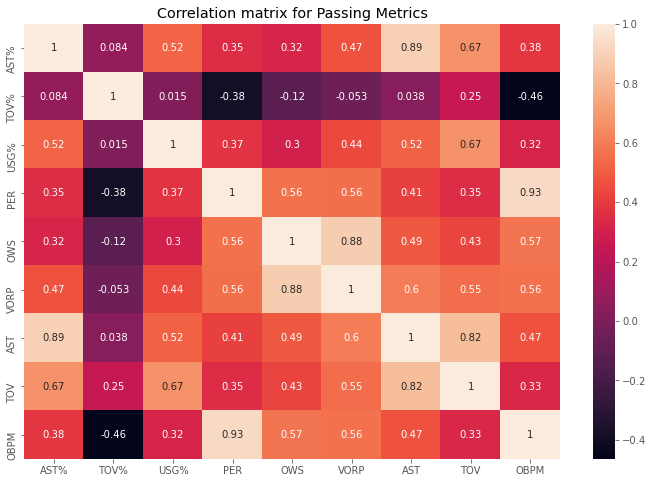

In [265]:
sns.heatmap(df_combined[['AST%','TOV%', 'USG%', 'PER', 'OWS', 'VORP','AST','TOV','OBPM']].corr()
, annot = True)

plt.title("Correlation matrix for Passing Metrics")

plt.show()

C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keyla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.4% of the points

<AxesSubplot:xlabel='Tm', ylabel='VORP'>

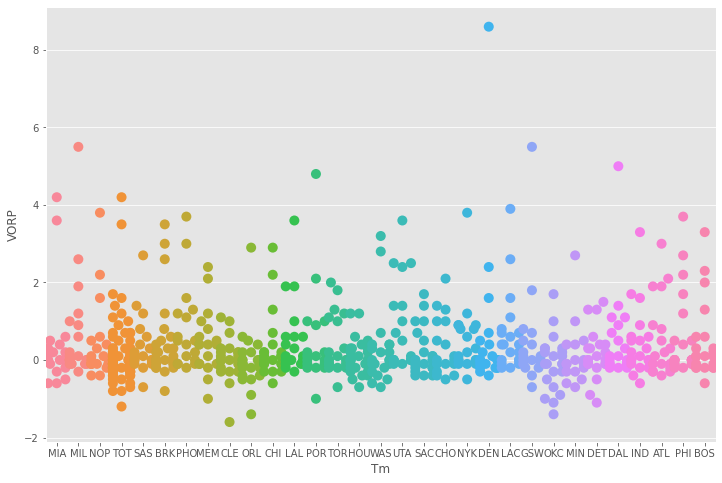

In [253]:
sns.swarmplot(x="Tm", y="VORP", data=df_combined, size=10)


False